##### ✦ Estadísticas de los primeros 10 minutos de las partidas clasificatorias en la liga diamante del videojuego League of Legends
Este set de datos es propuesto por el equipo y consiste en las estadísticas de las partidas clasificatorias en la liga diamante de League Of Legends, con este set de datos se pretende predecir cual equipo ganará una partida a partir de los features más relevantes del set de datos.

El target del set de datos es cuál equipo va a ganar, en este caso, 1 se refiere a que el equipo azul va a ganar y 0 se refiere a que el equipo rojo va a ganar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

from ourmodels.KNearestNeighbors import KNearestNeighbors as OurKNearestNeighbors
from ourmodels.DecisionTree import DecisionTreeClassifier as OurDecisionTree
from ourmodels.LogisticRegression import LogisticRegression as OurLogisticRegression

# 1. ANÁLISIS DE DATOS

In [2]:
# Load the data science salaries dataset
df = pd.read_csv("datasets/high_diamond_ranked_10min.csv")
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [3]:
# gameId feature removed
features = df.columns.to_list()
features.remove('gameId')

# The blueWins is the target feature, 1 means blueTeam wins and 0 means readTeam wins
df = df[features]
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [4]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
#sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', annot_kws={"fontsize": 9},  fmt='.2f', )

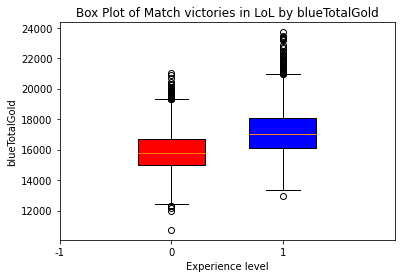

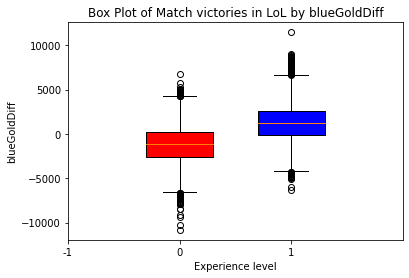

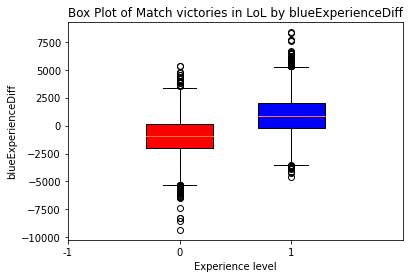

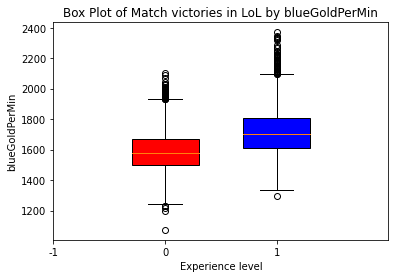

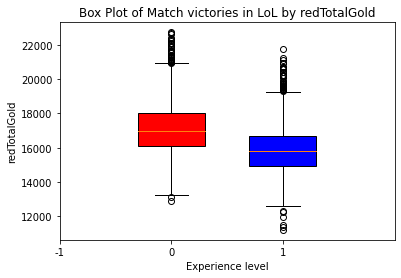

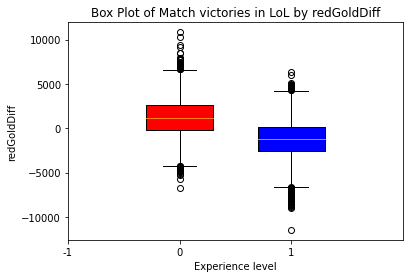

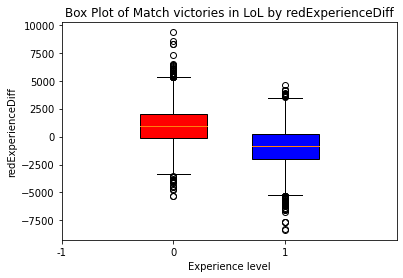

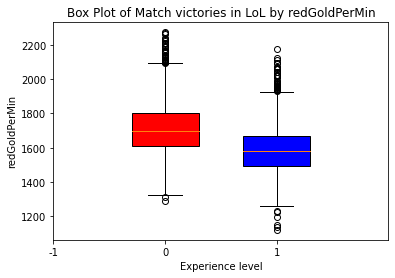

In [5]:

# Select features with correlation with "quality" greater than or equal to 0.2 or less than or equal to -0.2
selected_features = corr_matrix[abs(corr_matrix["blueWins"]) >= 0.40]["blueWins"].index.tolist()

# Remove the features that do not meet the selection criteria
df = df[selected_features]
features_names = df.columns.to_list()

# Get the list of features
features = df.columns.to_list()
features.remove("blueWins")

# Define colors for each quality value
colors = {0: 'red', 1: 'blue'}

# Create a box plot for each feature
for feature in features:
    # Create a new figure and axis for each feature
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Loop through each quality value and plot the box
    for match_result in sorted(df['blueWins'].unique()):
        box_color = colors[match_result]  # Get the color for this quality value
        data = df[df['blueWins'] == match_result][feature]  # Get the data for this quality value
        ax.boxplot(data, positions=[match_result], widths=0.6, showfliers=True, patch_artist=True, boxprops=dict(facecolor=box_color))
    
    # Set the title and axis labels
    plt.title("Box Plot of Match victories in LoL by " + feature)
    plt.xlabel("Experience level")
    plt.ylabel(feature)
    
    # Set the x-axis limits and ticks
    ax.set_xlim(0, 2)
    ax.set_xticks(range(-1, 2))
    ax.set_xticklabels(range(-1, 2))
    
    # Remove the grid lines
    ax.grid(False)
    
    # Show the plot
    plt.show()

In [6]:
# Remove the red team diff features because are the inverse of the blue tea diff features 

df = df[['blueWins', 'blueTotalGold', 'redTotalGold', 'blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin', 'redGoldPerMin']]
df

,blueWins,blueTotalGold,redTotalGold,blueGoldDiff,blueExperienceDiff,blueGoldPerMin,redGoldPerMin
0,0,17210,16567,643,-8,1721.0,1656.7
1,0,14712,17620,-2908,-1173,1471.2,1762.0
2,0,16113,17285,-1172,-1033,1611.3,1728.5
3,0,15157,16478,-1321,-7,1515.7,1647.8
4,0,16400,17404,-1004,230,1640.0,1740.4
...,...,...,...,...,...,...,...
9874,1,17765,15246,2519,2469,1776.5,1524.6
9875,1,16238,15456,782,888,1623.8,1545.6
9876,0,15903,18319,-2416,-1877,1590.3,1831.9
9877,0,14459,15298,-839,-1085,1445.9,1529.8


<AxesSubplot:>

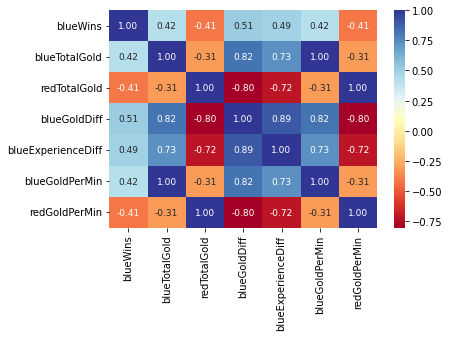

In [7]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', annot_kws={"fontsize": 9},  fmt='.2f', )

# 2. FEATURE ENGINEERING

In [8]:
""" Remove outliers, this values skew the mean and standard deviation, resulting in normalization that 
is not representative of the majority of the data points. """

# Get the interquartile range for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Get the lower and upper bounds for each column
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Get the mean for each feature in the IQR
IQR_mean = (Q1 + Q3) / 2

# # Replace the values that are outside the interquartile range with the mean of the feature in the IQR
df_iqr = df.where((df >= lower) & (df <= upper), other=IQR_mean, axis=1)

# Remove the values that are outside the interquartile range
# df_iqr = df[(df >= lower) & (df <= upper)].dropna()

""" Normalize using MinMaxScaler method. """

# Create a copy of the dataframe without the quality feature
df_to_normalize = df_iqr.iloc[:, :-1]

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the df_to_normalize dataset
scaler.fit(df_to_normalize)

# Transform the df_without_quality dataset using the scaler
df_normalized = pd.DataFrame(scaler.transform(df_to_normalize), columns=df_to_normalize.columns)

# Add the quality feature of the original dataframe to the normalized dataframe
df_normalized['blueWins'] = df['blueWins']

df_normalized

,blueWins,blueTotalGold,redTotalGold,blueGoldDiff,blueExperienceDiff,blueGoldPerMin
0,0,0.594558,0.507207,0.551448,0.505275,0.594558
1,0,0.285591,0.642728,0.270382,0.388225,0.285591
2,0,0.458874,0.599614,0.407789,0.402291,0.458874
3,0,0.340631,0.495753,0.395995,0.505375,0.340631
4,0,0.494372,0.614929,0.421086,0.529187,0.494372
...,...,...,...,...,...,...
9874,1,0.663203,0.337194,0.699937,0.754144,0.663203
9875,1,0.474335,0.364221,0.562451,0.595298,0.474335
9876,0,0.432900,0.732690,0.309324,0.317492,0.432900
9877,0,0.254298,0.343887,0.434146,0.397066,0.254298


# 3. PREPROCESAMIENTO

In [9]:
# Divides the "blueWins" column into two categories using bins and labels.
bins = [-1, 0.5, 1]
labels = ["RED TEAM WINS", "BLUE TEAM WINS"]
df_normalized["blueWins"] = pd.cut(df_normalized["blueWins"], bins=bins, labels=labels)

# show the updated dataframe
count = df_normalized["blueWins"].value_counts()
print(f"Categorías:\n   RED TEAM WINS {count[0]}\n   BLUE TEAM WINS {count[1]}\n")

# Converting the categorical labels in the "quality" column of the normalized dataset to numerical values.
lb = LabelEncoder()
df_normalized["blueWins"] = lb.fit_transform(df_normalized["blueWins"])

# Replace the labels with 0 and 1
df_normalized["blueWins"].replace({1: 0, 0: 1}, inplace=True)

# Get the arrays
X = df_normalized.drop("blueWins", axis=1)
y = df_normalized["blueWins"]

# Cast to numpy
X = X.to_numpy()
y = y.to_numpy()

# Splits the dataset into training and testing sets using train_test_split (stratifying based on the "quality" variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=21, stratify=y)

Categorías:
   RED TEAM WINS 4949
   BLUE TEAM WINS 4930



# MODELOS
Evaluar de manera objetiva 3 algoritmos de aprendizaje supervisado

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

def compare_models_metrics(y_test, y_pred_sklearn, y_pred_our_model, sklearn_model):
    
    '''SKLEARN'''
    # Calculate sklearn accuracy, precision and recall
    sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
    sklearn_precision = precision_score(y_test, y_pred_sklearn)
    sklearn_recall = recall_score(y_test, y_pred_sklearn)
    sklearn_auc = roc_auc_score(y_test, y_pred_sklearn)

    '''OUR MODEL'''
    # Calculate our model metrics
    our_accuracy = accuracy_score(y_test, y_pred_our_model)
    our_precision = precision_score(y_test, y_pred_our_model)
    our_recall = recall_score(y_test, y_pred_our_model)
    our_auc = roc_auc_score(y_test, y_pred_our_model)

    '''CHART'''
    # Get the probabilities of the positive class
    y_prob_sklearn = sklearn_model.predict_proba(X_test)[:, 1]
    # Calculate the TPR and FPR values for different classification thresholds
    fpr_sklearn, tpr_sklearn, thresholds_sklearn = roc_curve(y_test, y_prob_sklearn)
    # Plot the ROC curve
    plt.plot(fpr_sklearn, tpr_sklearn, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % sklearn_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Especifidad')
    plt.ylabel('Sensibilidad')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    '''TABLE'''
    # Create a dataframe with the metrics
    metrics = {
        'Accuracy': [sklearn_accuracy, our_accuracy,],
        'Precision': [ sklearn_precision, our_precision,],
        'Recall': [sklearn_recall, our_recall, ],
        'AUC': [sklearn_auc, our_auc, ]
    }
        
    return pd.DataFrame.from_dict(metrics, orient='index', columns=["Sklearn's model", 'Our model', ])

### REGRESIÓN LOGÍSTICA

Best parameters:  {'C': 0.2}
Best score:  0.7266781648844429


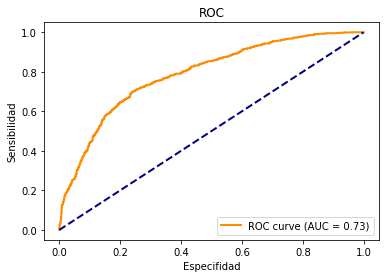

,Sklearn's model,Our model
Accuracy,0.727229,0.728193
Precision,0.733598,0.733202
Recall,0.712355,0.716216
AUC,0.727207,0.728175


In [11]:
""" Find best params for the model using GridSearch """

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
max_iter = 100000

# Create an instance of the logistic regression model
log_reg = LogisticRegression(max_iter=max_iter)

# Create and fit GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5).fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the best parameters and the corresponding accuracy score
print("Best parameters: ", best_params)
print("Best score: ", best_score)

""" Use best params the create the models """

'''SKLEARN'''
# Create a new logistic regression model with the best parameters and make predictions
sklearn_log_reg = LogisticRegression(C=best_params['C'])
sklearn_log_reg.fit(X_train, y_train)
y_pred_sklearn = sklearn_log_reg.predict(X_test)

'''OUR MODEL'''
# Fit Our model and make predictions
our_log_reg = OurLogisticRegression(lr=best_params['C'], num_iter=max_iter)
our_log_reg.fit(X_train, y_train)
y_pred_our_model = our_log_reg.predict(X_test, 0.5)

# Show Graphics and table
dataframe = compare_models_metrics(y_test, y_pred_sklearn, y_pred_our_model, sklearn_log_reg)
dataframe

### ÁRBOL

Best parameters:  {'max_depth': 10}
Best score:  0.6954121289771514


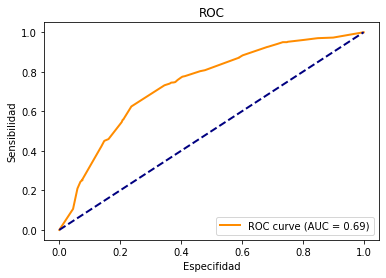

,Sklearn's model,Our model
Accuracy,0.688675,0.699759
Precision,0.668977,0.689972
Recall,0.745174,0.723938
AUC,0.688756,0.699794


In [12]:
""" Find best params for the model using GridSearch """

# Define the parameter grid for grid search
depth = [i for i in range(10, 100, 5)]
param_grid = {'max_depth': depth}

# Create a DecisionTreeClassifier instance
tree = DecisionTreeClassifier()

# Create and fit a GridSearchCV instance
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the best parameters and the corresponding accuracy score
print("Best parameters: ", best_params)
print("Best score: ", best_score)

""" Use best params the create the models """

'''SKLEARN'''
# Create a new knn model with the best parameters and make predictions
sklearn_tree = DecisionTreeClassifier(max_depth=best_params['max_depth']).fit(X_train, y_train)
sklearn_tree.fit(X_train, y_train)
y_pred_sklearn = sklearn_tree.predict(X_test)

# '''OUR MODEL'''
# Fit Our model and make predictions
our_tree = OurDecisionTree(max_depth=best_params['max_depth'])
our_tree.fit(X_train, y_train)
y_pred_our_model = our_tree.predict(X_test)

# Show Graphics and table
dataframe = compare_models_metrics(y_test, y_pred_sklearn, y_pred_our_model, sklearn_tree)
dataframe

# KNN

Best parameters:  {'n_neighbors': 83, 'weights': 'uniform'}
Best score:  0.7247560735228897


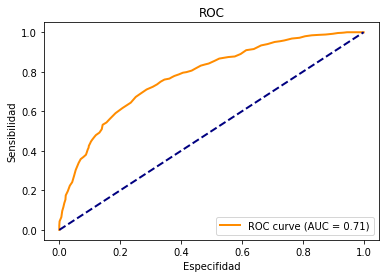

,Sklearn's model,Our model
Accuracy,0.708434,0.708434
Precision,0.701590,0.701590
Recall,0.723938,0.723938
AUC,0.708456,0.708456


In [13]:
""" Find best params for the model using GridSearch """

# Define the parameter grid for grid search
n = [i for i in range(1, 100, 2)]
param_grid = {'n_neighbors': n, 'weights': ['uniform', 'distance']}

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Create and fit a GridSearchCV instance
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the corresponding accuracy score
print("Best parameters: ", best_params)
print("Best score: ", best_score)

""" Use best params the create the models """

'''SKLEARN'''
# Create a new knn model with the best parameters and make predictions
sklearn_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
sklearn_knn.fit(X_train, y_train)
y_pred_sklearn = sklearn_knn.predict(X_test)

'''OUR MODEL'''
# Fit Our model and make predictions
our_tree = OurKNearestNeighbors(X_train, y_train, n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
y_pred_our_model = our_tree.predict(X_test)

# Show Graphics and table
dataframe = compare_models_metrics(y_test, y_pred_sklearn, y_pred_our_model, sklearn_knn)
dataframe